In [2]:
import pandas as pd
%matplotlib inline

## Challenge - Distributions

* Create a new DataFrame by joining the contents of the surveys.csv and species.csv tables. Then calculate and plot the distribution of:
    - taxa by plot
    - taxa by sex by plot

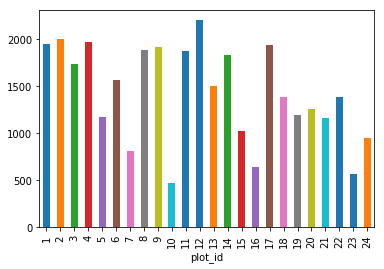

In [62]:
survey_df=pd.read_csv("surveys.csv")
species_df=pd.read_csv("species.csv")
merge=pd.merge(survey_df, species_df, how='left')
merge.groupby('plot_id')['taxa'].count().plot(kind='bar')

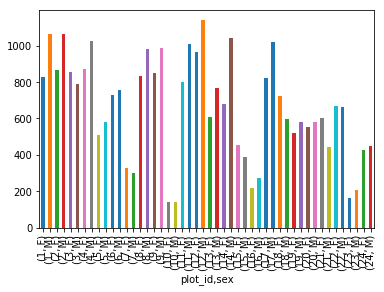

In [63]:
merge.groupby(['plot_id', 'sex'])['taxa'].count().plot(kind='bar')

## Challenge - Diversity Index

* In the data folder, there is a plot CSV that contains information about the type associated with each plot. Use that data to summarize the number of plots by plot type.
    - Calculate a diversity index of your choice for control vs rodent exclosure plots. The index should consider both species abundance and number of species. 
    - You might choose to use the simple biodiversity index described here which calculates diversity as: the number of species in the plot / the total number of individuals in the plot = Biodiversity index.

In [48]:
plots=pd.read_csv("plots.csv")

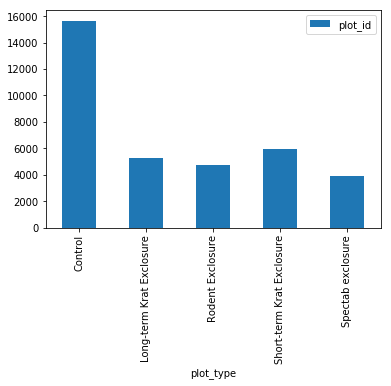

In [60]:
plot_more=pd.merge(survey_df,plots,on='plot_id')
plot_more[['plot_id','plot_type']].groupby('plot_type').count().plot(kind='bar')

In [74]:
#Biodiversity index = (the number of species in the plot / the total number of individuals in the plot) has been used. 
plot_diversity=plot_more.groupby(['plot_type', 'species_id']).count()

In [75]:
plot_diversity

record_id  month   day  year  plot_id  \
plot_type                 species_id                                          
Control                   AB                 76     76    76    76       76   
                          AH                125    125   125   125      125   
                          AS                  1      1     1     1        1   
                          BA                  1      1     1     1        1   
                          CB                 13     13    13    13       13   
                          CM                  2      2     2     2        2   
                          CQ                  2      2     2     2        2   
                          CS                  1      1     1     1        1   
                          DM               6760   6760  6760  6760     6760   
                          DO               1671   1671  1671  1671     1671   
                          DS               1389   1389  1389  1389     1389   
                          DX                 27     27    27    27       27   
                          NL                610    610   610   610      610   
                          OL                471    471   471   471      471   
                          OT               1004   1004  1004  1004     1004   
                          OX                  6      6     6     6        6   
                          PB                789    789   789   789      789   
                          PC                  8      8     8     8        8   
                          PE                343    343   343   343      343   
                          PF                424    424   424   424      424   
                          PG                  3      3     3     3        3   
                          PH                 11     11    11    11       11   
                          PI                  5      5     5     5        5   
                          PL                  1      1     1     1        1   
                          PM                120    120   120   120      120   
                          PP               1108   1108  1108  1108     1108   
                          RF                 11     11    11    11       11   
                          RM                403    403   403   403      403   
                          RO                  1      1     1     1        1   
                          SA                 29     29    29    29       29   
...                                         ...    ...   ...   ...      ...   
Short-term Krat Exclosure ZL                  1      1     1     1        1   
Spectab exclosure         AB                 16     16    16    16       16   
                          AH                 23     23    23    23       23   
                          BA                  1      1     1     1        1   
                          CB                  1      1     1     1        1   
                          CM                  1      1     1     1        1   
                          DM               1584   1584  1584  1584     1584   
                          DO                693    693   693   693      693   
                          DS                520    520   520   520      520   
                          DX                  7      7     7     7        7   
                          NL                 77     77    77    77       77   
                          OL                121    121   121   121      121   
                          OT                188    188   188   188      188   
                          PB                133    133   133   133      133   
                          PC                  3      3     3     3        3   
                          PE                 32     32    32    32       32   
                          PF                 68     68    68    68       68   
                          PH                  3      3     3     3        3   
         

In [78]:
for i in plot_diversity['plot_id']: 
    print(i, i.index())

AttributeError: 'int' object has no attribute 'index'

## Merge on Multiple Columns

* Create two columns in the sleep and exercise data sets: Then try to merge them by joining on both columns!  

In [86]:
sleep=pd.read_csv("health/sleep-export2.csv")
exercise=pd.read_csv("health/exercise.csv")

sleep.shape

(279, 14)

In [97]:
sleep['add_1']=list(range(279))
sleep['add_2']=list(range(279))
exercise['add_1']=list(range(341))
exercise['add_2']=list(range(341))
print(sleep.head())
print(exercise.head())

   Unnamed: 0  efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

      com.samsung.health.sleep.datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom  com.samsung.health.sleep.end_time  \
0                              NaN                      1520501400000   
1                              NaN                      1519565280000   
2                              NaN                      1527932940000   
3                              NaN                      1529749920000   
4                              NaN                 

In [94]:
mergefile=pd.merge(sleep, exercise, on=['add_1','add_2'])
mergefile.head()

,Unnamed: 0_x,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,...,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,...,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,...,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.000,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,...,0.0,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
3,3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,NaN,NaN,1529749920000,NaN,1529735940000,UTC-0300,...,0.0,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...,NaN,NaN,NaN,NaN,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1,2018-02-24 13:52:08.229
4,4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,NaN,NaN,1515159660000,NaN,1515128040000,UTC-0400,...,0.0,NaN,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,NaN,NaN,NaN,NaN,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581


## Multi-index

* Follow what has happened here : https://github.com/justmarkham/pandas-videos/blob/master/pandas_multiindex.ipynb And replicate it with the survey_df we had :

	- Group by plot)id, species_id to create a multi_idex df

	- slice the data in the df so that you get the individual species_id / plot_id

	- plot the count of one specific species of your choice per plot_id


In [21]:
survey_df=pd.read_csv("surveys.csv")
survey_df.set_index(['plot_id', 'species_id'], inplace=True)

survey_df.sort_index(inplace=True)

survey_df.loc[(1, 'AB'), :]

#for i in range(1,25):
    #survey_df[i]

C:\Users\orpit\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


record_id  month  day  year  sex  hindfoot_length  weight
plot_id species_id                                                           
1       AB               7595      3   15  1983  NaN              NaN     NaN
        AB               9690     10   21  1984  NaN              NaN     NaN
        AB              14073      2   21  1988  NaN              NaN     NaN
        AB              14078      2   21  1988  NaN              NaN     NaN
        AB              14087      2   21  1988  NaN              NaN     NaN
        AB              21332      2    1  1994  NaN              NaN     NaN
        AB              33324      1   12  2002  NaN              NaN     NaN

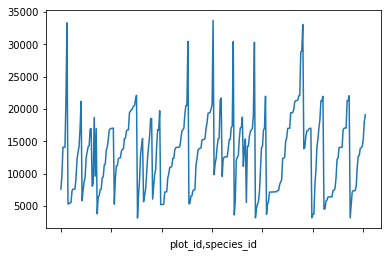

In [100]:
survey_grouped=survey_df.loc[(slice(None), 'AB'), :]
survey_grouped['record_id'].plot()